## Exploratory Analysis
<br>
Guiding Questions
* What proportions do teams pass vs run, are there any treads related to this with QB's and RB's, does this impact winning?
* Has the league changed over the years and how so?
* What type of statistics are common among winning teams?
* What are the impacts of playing at home vs away?

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
pd.options.mode.chained_assignment = None
np.warnings.filterwarnings('ignore')
plt.style.use('seaborn')

First we will collect and organize our data so that we can begin to analyze it

In [3]:
#Get player stats
player_stats = pd.read_csv('C:\\Users\\Louie\\Repositories\\Springboard\\Capstone 1 - NFL Matchup Predictions\\Data Wrangling\\Data\\players.csv')
player_stats.head()

,year,team,pass_to_run,completion_perc,pass_len,interceptions_turnover,pass_touchdowns,rush_touchdowns,running_back_avg,rec_max_touchdowns,max_yards_per_catch,rec_yards_max,rec_spread,max_sacks,max_tackles,sacks,int_take,forced_fumbles,qb_pass_to_run,rb_run_to_catch
0,2009,ARI,0.62,0.66,10.70,18,28,15,4.51,13,12.95,1092,19.39,8,90,46,21,9,0.96,0.94
1,2009,ATL,0.56,0.58,11.14,17,26,15,4.89,11,13.56,1153,26.70,7,103,30,15,17,0.94,0.97
2,2009,BAL,0.52,0.63,11.33,13,21,22,5.27,7,14.12,1028,23.09,7,94,34,22,13,0.94,0.77
3,2009,BUF,0.51,0.58,10.89,19,17,6,4.46,7,15.07,829,12.14,11,87,34,28,12,0.88,0.84
4,2009,CAR,0.47,0.57,11.63,20,16,18,5.13,7,20.17,982,18.27,11,112,33,22,20,0.95,0.92


In [4]:
#Get team stats
team_stats = pd.read_csv('C:\\Users\\Louie\\Repositories\\Springboard\\Capstone 1 - NFL Matchup Predictions\\Data Wrangling\\Data\\teams.csv')
team_stats.head()

,year,team,pyds,ryds,totfd,trnovr,pen
0,2009,ARI,4021,1489,317,36,108
1,2009,ATL,3571,1876,330,25,78
2,2009,BAL,3413,2206,320,22,115
3,2009,BUF,2515,1867,233,30,107
4,2009,CAR,2799,2498,289,31,88


In [5]:
#Merge for correlation
all_stats = player_stats.merge(team_stats, on=['year','team'])
all_stats.head()

,year,team,pass_to_run,completion_perc,pass_len,interceptions_turnover,pass_touchdowns,rush_touchdowns,running_back_avg,rec_max_touchdowns,...,sacks,int_take,forced_fumbles,qb_pass_to_run,rb_run_to_catch,pyds,ryds,totfd,trnovr,pen
0,2009,ARI,0.62,0.66,10.70,18,28,15,4.51,13,...,46,21,9,0.96,0.94,4021,1489,317,36,108
1,2009,ATL,0.56,0.58,11.14,17,26,15,4.89,11,...,30,15,17,0.94,0.97,3571,1876,330,25,78
2,2009,BAL,0.52,0.63,11.33,13,21,22,5.27,7,...,34,22,13,0.94,0.77,3413,2206,320,22,115
3,2009,BUF,0.51,0.58,10.89,19,17,6,4.46,7,...,34,28,12,0.88,0.84,2515,1867,233,30,107
4,2009,CAR,0.47,0.57,11.63,20,16,18,5.13,7,...,33,22,20,0.95,0.92,2799,2498,289,31,88


In [6]:
#Get winning pct per year for correlation analysis
games = pd.read_csv('C:\\Users\\Louie\\Repositories\\Springboard\\Capstone 1 - NFL Matchup Predictions\\Data Wrangling\\Data\\games.csv')
games.head()

home_wins = games[games['diff'] > 0]
home_w_2 = home_wins[['home','away','year']]
home_w_2['home_win'] = 1
home_w_2['away_win'] = 0

h_w = home_w_2[['home', 'home_win', 'year']]
h_w.columns = ['team', 'win', 'year']

a_l = home_w_2[['away', 'away_win', 'year']]
a_l.columns = ['team', 'win', 'year']

home_loses = games[games['diff'] <= 0]
home_l_2 = home_loses[['home','away','year']]
home_l_2['home_win'] = 0
home_l_2['away_win'] = 1

h_l = home_l_2[['home', 'home_win', 'year']]
h_l.columns = ['team', 'win', 'year']

a_w = home_l_2[['away', 'away_win', 'year']]
a_w.columns = ['team', 'win', 'year']


wins = pd.concat([h_w, a_l, h_l, a_w])
win_pct = wins.groupby(['year','team'])['win'].mean().round(3).reset_index()

total = win_pct.merge(all_stats, on=['year','team'])
total.head()

,year,team,win,pass_to_run,completion_perc,pass_len,interceptions_turnover,pass_touchdowns,rush_touchdowns,running_back_avg,...,sacks,int_take,forced_fumbles,qb_pass_to_run,rb_run_to_catch,pyds,ryds,totfd,trnovr,pen
0,2009,ARI,0.625,0.62,0.66,10.70,18,28,15,4.51,...,46,21,9,0.96,0.94,4021,1489,317,36,108
1,2009,ATL,0.562,0.56,0.58,11.14,17,26,15,4.89,...,30,15,17,0.94,0.97,3571,1876,330,25,78
2,2009,BAL,0.562,0.52,0.63,11.33,13,21,22,5.27,...,34,22,13,0.94,0.77,3413,2206,320,22,115
3,2009,BUF,0.375,0.51,0.58,10.89,19,17,6,4.46,...,34,28,12,0.88,0.84,2515,1867,233,30,107
4,2009,CAR,0.500,0.47,0.57,11.63,20,16,18,5.13,...,33,22,20,0.95,0.92,2799,2498,289,31,88


<h3>Passing and Rushing Distributions</h3>

First we take a look at the distributions of Passing vs Rushing in the league. Do teams pass the ball or rush the ball more and how does this pertain to scoring. We also look at how often the QB, a position oriented towards passing, runs the ball and how often the RB, a position oriented towards rushing, recieves passes. 

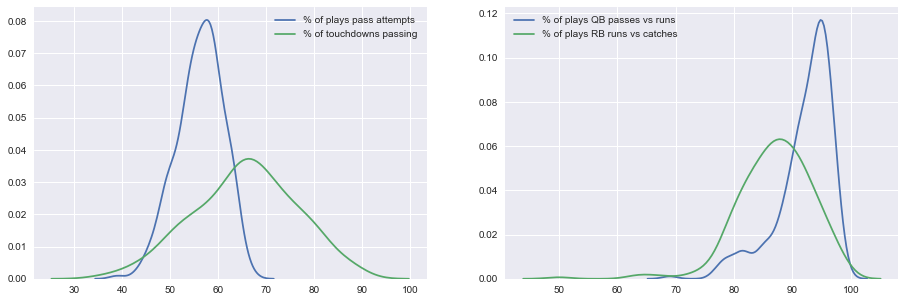

In [5]:
#Formatting config
f, axes = plt.subplots(1, 2)
fig = plt.gcf()
fig.set_size_inches(15.5, 5.0)

#Distributions of passing to running ratio
perc_pass_tds = player_stats['pass_touchdowns'].divide(player_stats['rush_touchdowns'] + player_stats['pass_touchdowns']).round(2)
sns.kdeplot(player_stats['pass_to_run'] * 100,label="% of plays pass attempts", ax=axes[0])
sns.kdeplot(perc_pass_tds * 100,label="% of touchdowns passing", ax=axes[0])

#QB and RB style distributions
sns.kdeplot(player_stats['qb_pass_to_run'] * 100,label="% of plays QB passes vs runs", ax=axes[1])
sns.kdeplot(player_stats['rb_run_to_catch'] * 100,label="% of plays RB runs vs catches", ax=axes[1])

Passing vs Running Play Composition (Left)
* Passing is the predominant form of playstyle and an even more common method for scoring touchdowns
* Normally distributed meaning play styles seem to be part of a spectrum not discrete groups
<br>
<br>

Passing vs Running Player Composition (Right)
* Specialized postitions such as RB and QB have a high percentage of one type of play style
* Both distributions seem bimodal

Next we investigate if there is any correlation between these statistics and winning. Does passing more lead to more wins? Is that why everyone is doing it?

Below see rather definitively and somewhat surprisingly that teams that pass more are losing more. This does not necessarily mean that passing alot causes a loss, maybe instead teams that are winning the game already run more to end the game faster therefore causing the correlation.


p - value: 1.5e-05



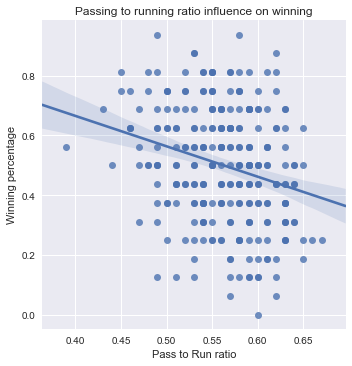

In [41]:

sns.lmplot(x="pass_to_run", y="win", data=total);
plt.xlabel('Pass to Run ratio')
plt.ylabel('Winning percentage')
plt.title('Passing to running ratio influence on winning')

cor, p_value = scipy.stats.pearsonr(total['pass_to_run'], total['win'])

print('')
print('p - value: ' + str(p_value.round(7)))
print('')

<h3>Trends</h3>
<br>
Below we look at how league wide performance changes over the past 8 years.

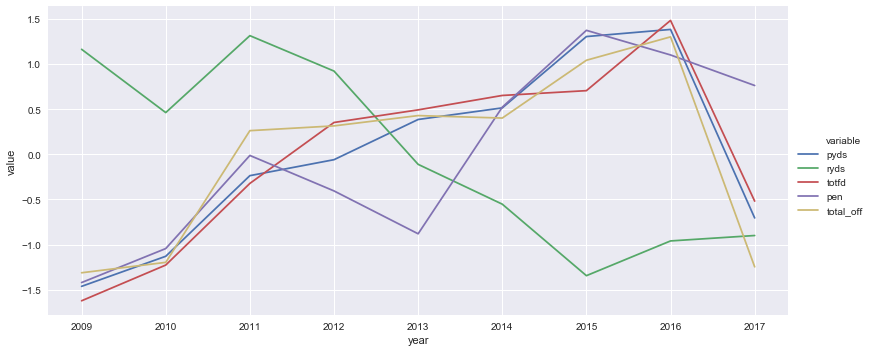

In [7]:
#Get team statistic trends by year

team_stats['total_off'] = team_stats['pyds'] + team_stats['ryds']

year_stats = team_stats.groupby(['year'])['pyds','ryds','totfd','trnovr','pen','total_off'].sum()
norm_year_stats = ((year_stats - year_stats.mean())/year_stats.std()).reset_index()

line_date = pd.melt(norm_year_stats, id_vars=['year'], value_vars=['pyds','ryds','totfd','pen','total_off'])

sns.relplot(y="value", x="year", kind='line', hue='variable', data=line_date, aspect=18.5/8.27);

* Strong correlation between passing, first downs, and total offense
* Penalties have been increasing the past 8 years
* Rushing has been decreasing past 8 years
* Last year produced low offensive numbers

<br>
<br>


<h3>Home vs Away</h3>

Finally we analyze differences between home and away games. We start by looking at the mean of statistics for teams that win at home to look for interesting patterns. Then we statistically analyze whether or not it's harder to win on the road.

In [42]:
#Get game data
game_stats = pd.read_csv('C:\\Users\\Louie\\Repositories\\Springboard\\Capstone 1 - NFL Matchup Predictions\\Data Wrangling\\Data\\nfl_matchups.csv')
del game_stats['home']
del game_stats['away']
game_stats.head()

,home_score,away_score,diff,home_win,week,pyds_home,ryds_home,totfd_home,trnovr_home,pen_home,...,max_yards_per_catch_away,rec_yards_max_away,rec_spread_away,max_sacks_away,max_tackles_away,sacks_away,int_take_away,forced_fumbles_away,qb_pass_to_run_away,rb_run_to_catch_away
0,13,10,3,1,1,4148,1790,331,26,85,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88
1,17,20,-3,0,11,4650,1475,340,28,95,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88
2,27,17,10,1,13,4515,1294,339,24,74,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88
3,13,17,-4,0,17,3503,1566,297,31,95,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88
4,59,0,59,1,6,4436,1921,373,22,81,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88


In [43]:
game_clean = ((game_stats - game_stats.mean())/game_stats.std())
game_clean.head()

,home_score,away_score,diff,home_win,week,pyds_home,ryds_home,totfd_home,trnovr_home,pen_home,...,max_yards_per_catch_away,rec_yards_max_away,rec_spread_away,max_sacks_away,max_tackles_away,sacks_away,int_take_away,forced_fumbles_away,qb_pass_to_run_away,rb_run_to_catch_away
0,-1.031016,-1.136790,0.035356,0.866625,-1.612155,0.722913,-0.062498,0.459664,0.209758,-1.073982,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524
1,-0.644824,-0.121994,-0.369982,-1.153383,0.384427,1.550004,-1.027514,0.706949,0.516136,-0.460766,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524
2,0.320655,-0.426433,0.508251,0.866625,0.783744,1.327579,-1.582014,0.679473,-0.096621,-1.748520,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524
3,-1.031016,-0.426433,-0.437538,-1.153383,1.582376,-0.339783,-0.748731,-0.474525,0.975703,-0.460766,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524
4,3.410190,-2.151587,3.818514,0.866625,-0.613864,1.197420,0.338825,1.613662,-0.402999,-1.319268,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524


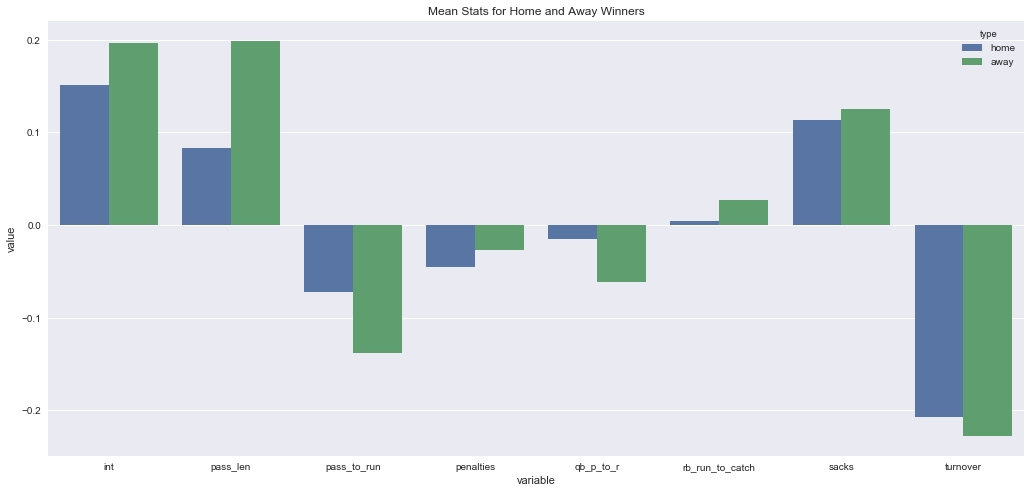

In [77]:
fig = plt.gcf()
fig.set_size_inches(17.5, 8.0)

#Teams that won at home and their common statistics normalized
home_wins = game_clean[game_clean['home_win'] > 0][['pass_to_run_home','trnovr_home','pen_home','pass_len_home','sacks_home','int_take_home','qb_pass_to_run_home','rb_run_to_catch_home']].mean()
home_wins2 = home_wins.to_frame().reset_index()
home_wins2.columns = ['statistics', 'value']
home_wins2['type'] = 'home'
home_wins3 = home_wins2.pivot(index='type', columns='statistics', values='value')
home_wins4 = home_wins3.reset_index()
home_wins4.columns = ['type','int','pass_len','pass_to_run','penalties','qb_p_to_r','rb_run_to_catch','sacks','turnover']

#Teams that won while away and their common statistics normalized
away_wins = game_clean[game_clean['home_win'] < 0][['pass_to_run_away','trnovr_away','pen_away','pass_len_away','sacks_away','int_take_away','qb_pass_to_run_away','rb_run_to_catch_away']].mean()
away_wins2 = away_wins.to_frame().reset_index()
away_wins2.columns = ['statistics', 'value']
away_wins2['type'] = 'away'
away_wins3 = away_wins2.pivot(index='type', columns='statistics', values='value')
away_wins4 = away_wins3.reset_index()
away_wins4.columns = ['type','int','pass_len','pass_to_run','penalties','qb_p_to_r','rb_run_to_catch','sacks','turnover']

winners = pd.concat([home_wins4,away_wins4])
final = pd.melt(winners, id_vars=['type'], value_vars=['int','pass_len','pass_to_run','penalties','qb_p_to_r','rb_run_to_catch','sacks','turnover'])
ax = sns.barplot(x='variable', y='value', hue='type', data=final)
ax.title.set_text('Mean Stats for Home and Away Winners')

* We can see that both home and away game winners have very similar distributions
* Away matches Home winners closely but almost all values are more extreme, except for penalties which matter less
* In both distributions turnovers are the most extreme statistics along with takeaways meaning a teams turnover ratio may be a huge indicator of a successful team
* Running more than average is also a sign of a successful team which is counter intuitive relative to the increase of passing yardage over the past 8 years and decrease of rushing yards
* There is a large difference between home and away winner passing lengths
<br>
<br>
Seeing that most statistics are more extreme for away team winners I propose this is because winning is harder so the statistics that make a winning team need to be even more pronounced to win while away. Below conduct a hypothesis test to investigate whether the difference in wining percentage for home vs away times is due to luck of an actual factor. The results show that when simulating complete independence for Home/Away and winning percentage none of our 10,000 trials generated a difference as large as we can see in our observed data. Because of this we can assume that playing on the road has a substantial impact on winning the game.


p-value: 0.0



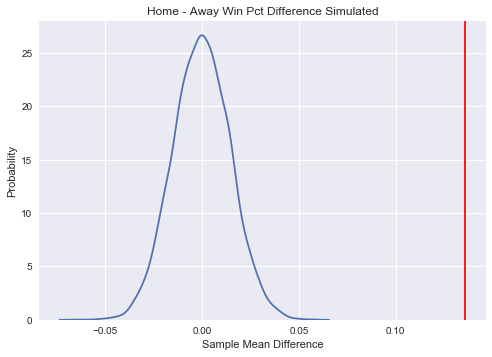

In [102]:
#Hypothesis test between Home win pct and Away win pct
np.random.seed(4594846)

home_win_mean = round(len(h_w) / (len(h_w) + len(h_l)),3)
away_win_mean = round(len(a_w) / (len(a_w) + len(a_l)),3)
diff = home_win_mean - away_win_mean

sample_diffs = []
for i in range(10000):
    sample = np.random.permutation(wins['win'])
    sample_h = sample[:int(len(sample) / 2)]
    sample_a = sample[int(len(sample) / 2):]
    sample_diffs.append(sample_h.mean() - sample_a.mean())

df_diffs = pd.Series(sample_diffs)
p_value = len(df_diffs[df_diffs > diff])/len(sample_diffs)

sns.kdeplot(sample_diffs)
plt.axvline(x=diff, c='red')

plt.xlabel('Sample Mean Difference')
plt.ylabel('Probability')
plt.title('Home - Away Win Pct Difference Simulated')

print('')
print('p-value: ' + str(p_value))
print('')